## Classification with Python
#### Author: David Palma

In this notebook we try to practice all the classification algorithms that we learned in this course.

Required libraries:

In [585]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [586]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-09-07 21:27:26--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2019-09-07 21:27:27 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [587]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [588]:
df.shape

(346, 10)

### Convert to date time object 

In [589]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [590]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [507]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         156 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ca-certificates-2019.5.15  |                1         134 KB  anaconda
    seaborn-0.9.0              |           py36_0         379 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.7 MB

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-1       --> 2019.5.15-1      anaconda
    certifi:         2019.6.16-py36_1  --> 2019.6.16-py36_1 anaconda
    openssl:         1.1.1c-h7b6447c_1 --> 1.1.1-h7b6447c_0 anaconda
    seaborn:         0.9.0-py36_0     

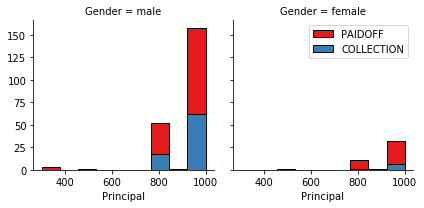

In [591]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

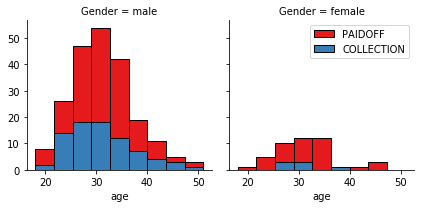

In [592]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

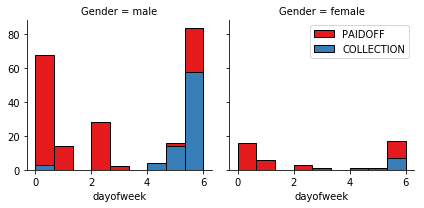

In [593]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [594]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [595]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [596]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [597]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [598]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [599]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [600]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [601]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [602]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Classification using the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [603]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [604]:
# split the dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 4)

print('Size of train set: ' + str(X_train.shape[0]) + ' x ' + str(X_train.shape[1]))
print('Size of test set: ' + str(X_test.shape[0]) + ' x ' + str(X_test.shape[1]))

Size of train set: 259 x 8
Size of test set: 87 x 8


In [605]:
# look for the best K
K        = 10
mean_acc = np.zeros((K - 1))
std_acc  = np.zeros((K - 1))

for k in range(1, K):
    
    # train model
    clf_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    
    # compute prediction
    y_hat = clf_knn.predict(X_test)
    
    # compute accuracy
    mean_acc[k - 1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[k - 1]  = np.std(y_hat == y_test)/np.sqrt(y_hat.shape[0])
    
    # print result
    print('K =', k, '\n', ' Accuracy:', '{0:.4f}'.format(mean_acc[k - 1]), '+/-', '{0:.6f}'.format(std_acc[k - 1]))

K = 1 
  Accuracy: 0.7356 +/- 0.047280
K = 2 
  Accuracy: 0.7126 +/- 0.048516
K = 3 
  Accuracy: 0.7586 +/- 0.045878
K = 4 
  Accuracy: 0.7356 +/- 0.047280
K = 5 
  Accuracy: 0.7931 +/- 0.043429
K = 6 
  Accuracy: 0.7816 +/- 0.044295
K = 7 
  Accuracy: 0.7931 +/- 0.043429
K = 8 
  Accuracy: 0.7816 +/- 0.044295
K = 9 
  Accuracy: 0.7701 +/- 0.045110


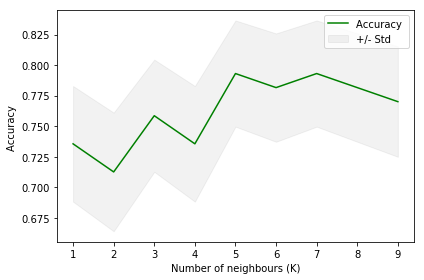

In [606]:
# plot the results
plt.clf()
plt.plot(range(1,K), mean_acc, 'g')
plt.fill_between(range(1,K), mean_acc - std_acc, mean_acc + std_acc, color='k', alpha=0.05)
plt.legend(('Accuracy ', '+/- Std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of neighbours (K)')
plt.tight_layout()
plt.show()

In [607]:
# create an instance of Neighbours Classifier and train the model with K=5
clf_knn = KNeighborsClassifier(n_neighbors = 5)
clf_knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

# Decision Tree

In [609]:
from sklearn.tree import DecisionTreeClassifier

In [610]:
# create an instance of Decision Tree Classifier and train the model
clf_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
clf_dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Support Vector Machine

In [611]:
from sklearn.svm import SVC

In [612]:
# create an instance of Support Vector Classifier and train the model
clf_svm = SVC(kernel='rbf')
clf_svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# Logistic Regression

In [613]:
from sklearn.linear_model import LogisticRegression

In [614]:
# create an instance of Logistic Regression Classifier and train the model
clf_lr = LogisticRegression(C = 0.01, solver = 'liblinear', random_state = 0)
clf_lr.fit(X, y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

# Model Evaluation using Test set

In [615]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [616]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-09-07 21:29:13--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-09-07 21:29:13 (349 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [617]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Pre-processing, feature extraction and normalisation

In [618]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)
test_df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bechalor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bechalor


In [619]:
# suppress warning about implicit conversion
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# feature selection
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature, pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1, inplace=True)
X_test = Feature
y_test = test_df['loan_status'].values

X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

#### K Nearest Neighbor

K Nearest Neighbor
F1-score: 0.8333333
Jaccard:  0.7407407


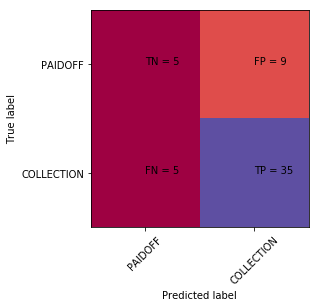

In [620]:
# compute prediction
y_hat = clf_knn.predict(X_test)

# compute various scores
y_t = y_test == 'PAIDOFF'
y_h = y_hat  == 'PAIDOFF'

knn_f1_score = f1_score(y_t, y_h)
knn_jaccard  = jaccard_similarity_score(y_t, y_h)

print('K Nearest Neighbor')
print('F1-score: %1.7f' % knn_f1_score)
print('Jaccard:  %1.7f' % knn_jaccard)

# plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_hat)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Spectral)
plt.ylabel('True label')
plt.xlabel('Predicted label')

class_names = ['PAIDOFF','COLLECTION']
tick_marks  = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j]) + ' = ' + str(cm[i][j]))

plt.show()

#### Decision Tree

Decision Tree
F1-score: 0.8148148
Jaccard:  0.7222222


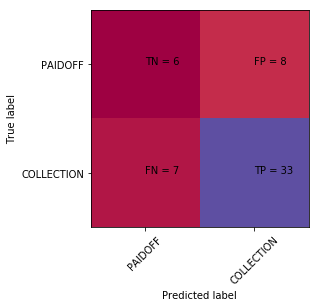

In [621]:
# compute prediction
y_hat = clf_dt.predict(X_test)

# compute various scores
y_t = y_test == 'PAIDOFF'
y_h = y_hat  == 'PAIDOFF'

dt_f1_score = f1_score(y_t, y_h)
dt_jaccard  = jaccard_similarity_score(y_t, y_h)

print('Decision Tree')
print('F1-score: %1.7f' % dt_f1_score)
print('Jaccard:  %1.7f' % dt_jaccard)

# plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_hat)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Spectral)
plt.ylabel('True label')
plt.xlabel('Predicted label')

class_names = ['PAIDOFF','COLLECTION']
tick_marks  = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j]) + ' = ' + str(cm[i][j]))

plt.show()

#### Support Vector Machine

Support Vector Machine
F1-score: 0.8387097
Jaccard:  0.7222222


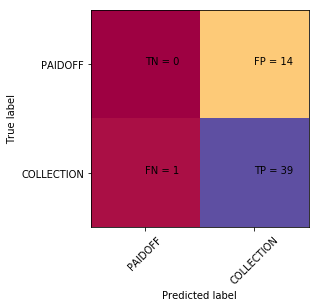

In [622]:
# compute prediction
y_hat = clf_svm.predict(X_test)

# compute various scores
y_t = y_test == 'PAIDOFF'
y_h = y_hat  == 'PAIDOFF'

svm_f1_score = f1_score(y_t, y_h)
svm_jaccard  = jaccard_similarity_score(y_t, y_h)

print('Support Vector Machine')
print('F1-score: %1.7f' % svm_f1_score)
print('Jaccard:  %1.7f' % svm_jaccard)

# plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_hat)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Spectral)
plt.ylabel('True label')
plt.xlabel('Predicted label')

class_names = ['PAIDOFF','COLLECTION']
tick_marks  = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j]) + ' = ' + str(cm[i][j]))

plt.show()

#### Logistic Regression

Logistic Regression
F1-score: 0.8510638
Log-loss: 0.5566085
Jaccard:  0.7407407


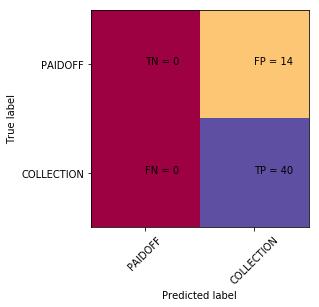

In [623]:
# compute prediction
y_hat  = clf_lr.predict(X_test)
y_prob = clf_lr.predict_proba(X_test)

# compute various scores
y_t = y_test == 'PAIDOFF'
y_h = y_hat  == 'PAIDOFF'

lr_f1_score = f1_score(y_t, y_h)
lr_log_loss = log_loss(y_t, y_prob)
lr_jaccard  = jaccard_similarity_score(y_t, y_h)

print('Logistic Regression')
print('F1-score: %1.7f' % lr_f1_score)
print('Log-loss: %1.7f' % lr_log_loss)
print('Jaccard:  %1.7f' % lr_jaccard)

# plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_hat)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Spectral)
plt.ylabel('True label')
plt.xlabel('Predicted label')

class_names = ['PAIDOFF','COLLECTION']
tick_marks  = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j]) + ' = ' + str(cm[i][j]))

plt.show()

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.74    | 0.83     | NA      |
| Decision Tree      | 0.72    | 0.81     | NA      |
| SVM                | 0.72    | 0.84     | NA      |
| LogisticRegression | 0.74    | 0.85     | 0.56    |